In [1]:
import h2o
from h2o.automl import H2OAutoML

h2o.init(max_mem_size='12G')
print(h2o.__version__)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "23.0.1" 2024-10-15; OpenJDK Runtime Environment Homebrew (build 23.0.1); OpenJDK 64-Bit Server VM Homebrew (build 23.0.1, mixed mode, sharing)
  Starting server from /Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/g7/z7m625rj50d5ptztzplh4wgc0000gn/T/tmpkl7vs5p4
  JVM stdout: /var/folders/g7/z7m625rj50d5ptztzplh4wgc0000gn/T/tmpkl7vs5p4/h2o_ralf_started_from_python.out
  JVM stderr: /var/folders/g7/z7m625rj50d5ptztzplh4wgc0000gn/T/tmpkl7vs5p4/h2o_ralf_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_ralf_0mk4tj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,11.98 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


3.46.0.6


In [2]:
%%time

import warnings
warnings.filterwarnings('ignore')

CPU times: user 21 μs, sys: 0 ns, total: 21 μs
Wall time: 23.1 μs


In [3]:
%%time

import os
import pandas as pd
from pipelines import preprocessing_pipeline

train_data_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'train.csv')
train_df = pd.read_csv(train_data_file, index_col=0, low_memory=False)
train_df = preprocessing_pipeline.fit_transform(train_df)
train_h2o = h2o.H2OFrame(train_df)
train_h2o.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 18.8 s, sys: 2.26 s, total: 21.1 s
Wall time: 24 s


p_num,day_phase,bg-2:00,bg-1:55,bg-1:50,bg-1:45,bg-1:40,bg-1:35,bg-1:30,bg-1:25,bg-1:20,bg-1:15,bg-1:10,bg-1:05,bg-1:00,bg-0:55,bg-0:50,bg-0:45,bg-0:40,bg-0:35,bg-0:30,bg-0:25,bg-0:20,bg-0:15,bg-0:10,bg-0:05,bg-0:00,insulin-2:00,insulin-1:55,insulin-1:50,insulin-1:45,insulin-1:40,insulin-1:35,insulin-1:30,insulin-1:25,insulin-1:20,insulin-1:15,insulin-1:10,insulin-1:05,insulin-1:00,insulin-0:55,insulin-0:50,insulin-0:45,insulin-0:40,insulin-0:35,insulin-0:30,insulin-0:25,insulin-0:20,insulin-0:15,insulin-0:10,insulin-0:05,insulin-0:00,hr-2:00,hr-1:55,hr-1:50,hr-1:45,hr-1:40,hr-1:35,hr-1:30,hr-1:25,hr-1:20,hr-1:15,hr-1:10,hr-1:05,hr-1:00,hr-0:55,hr-0:50,hr-0:45,hr-0:40,hr-0:35,hr-0:30,hr-0:25,hr-0:20,hr-0:15,hr-0:10,hr-0:05,hr-0:00,cals-2:00,cals-1:55,cals-1:50,cals-1:45,cals-1:40,cals-1:35,cals-1:30,cals-1:25,cals-1:20,cals-1:15,cals-1:10,cals-1:05,cals-1:00,cals-0:55,cals-0:50,cals-0:45,cals-0:40,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,bg+1:00
p01,morning,17.2,17.5333,17.8667,18.2,18.2667,18.3333,18.4,18.2667,18.1333,18,17.7667,17.5333,17.3,17.3667,17.4333,17.5,17.4333,17.3667,17.3,16.9333,16.5667,16.2,15.8333,15.4667,15.1,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0417,0.0417,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,99.6,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,4.8,13.4
p01,morning,18.2,18.2667,18.3333,18.4,18.2667,18.1333,18,17.7667,17.5333,17.3,17.3667,17.4333,17.5,17.4333,17.3667,17.3,16.9333,16.5667,16.2,15.8333,15.4667,15.1,14.8667,14.6333,14.4,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0417,0.0417,0.0417,0.0417,0.0417,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,99.6,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,4.8,12.8
p01,morning,18.4,18.2667,18.1333,18,17.7667,17.5333,17.3,17.3667,17.4333,17.5,17.4333,17.3667,17.3,16.9333,16.5667,16.2,15.8333,15.4667,15.1,14.8667,14.6333,14.4,14.2333,14.0667,13.9,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,99.6,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,4.8,15.5
p01,morning,18,17.7667,17.5333,17.3,17.3667,17.4333,17.5,17.4333,17.3667,17.3,16.9333,16.5667,16.2,15.8333,15.4667,15.1,14.8667,14.6333,14.4,14.2333,14.0667,13.9,13.8667,13.8333,13.8,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,99.6,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,4.8,14.8
p01,morning,17.3,17.3667,17.4333,17.5,17.4333,17.3667,17.3,16.9333,16.5667,16.2,15.8333,15.4667,15.1,14.8667,14.6333,14.4,14.2333,14.0667,13.9,13.8667,13.8333,13.8,13.6667,13.5333,13.4,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,99.6,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.9

In [4]:
%%time
test_data_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'test.csv')
test_df = pd.read_csv(test_data_file, index_col=0, low_memory=False)
test_df = preprocessing_pipeline.transform(test_df)
test_h2o = h2o.H2OFrame(test_df)
test_h2o.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 413 ms, sys: 55.5 ms, total: 468 ms
Wall time: 929 ms


p_num,day_phase,bg-2:00,bg-1:55,bg-1:50,bg-1:45,bg-1:40,bg-1:35,bg-1:30,bg-1:25,bg-1:20,bg-1:15,bg-1:10,bg-1:05,bg-1:00,bg-0:55,bg-0:50,bg-0:45,bg-0:40,bg-0:35,bg-0:30,bg-0:25,bg-0:20,bg-0:15,bg-0:10,bg-0:05,bg-0:00,insulin-2:00,insulin-1:55,insulin-1:50,insulin-1:45,insulin-1:40,insulin-1:35,insulin-1:30,insulin-1:25,insulin-1:20,insulin-1:15,insulin-1:10,insulin-1:05,insulin-1:00,insulin-0:55,insulin-0:50,insulin-0:45,insulin-0:40,insulin-0:35,insulin-0:30,insulin-0:25,insulin-0:20,insulin-0:15,insulin-0:10,insulin-0:05,insulin-0:00,hr-2:00,hr-1:55,hr-1:50,hr-1:45,hr-1:40,hr-1:35,hr-1:30,hr-1:25,hr-1:20,hr-1:15,hr-1:10,hr-1:05,hr-1:00,hr-0:55,hr-0:50,hr-0:45,hr-0:40,hr-0:35,hr-0:30,hr-0:25,hr-0:20,hr-0:15,hr-0:10,hr-0:05,hr-0:00,cals-2:00,cals-1:55,cals-1:50,cals-1:45,cals-1:40,cals-1:35,cals-1:30,cals-1:25,cals-1:20,cals-1:15,cals-1:10,cals-1:05,cals-1:00,cals-0:55,cals-0:50,cals-0:45,cals-0:40,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00
p01,morning,13.7667,13.7333,13.7,13.7667,13.8333,13.9,14.1333,14.3667,14.6,14.4333,14.2667,14.1,13.5333,12.9667,12.4,11.7667,11.1333,10.5,10.225,9.95,9.675,9.4,9.46667,9.53333,9.6,0.0583,0.0583,0.0583,0.0583,0.0527,0,2.1568,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,55,54,54.7,57.3,54.1,57,52.2,52.1,53,54.1,54.4,56.1,55.5,54.9,53.6,53.5,53.4,56,55.8,54.4,53.2,55.6,55.1,54.9,54.7,4.8,4.8,4.8,4.8,4.8,4.8,4.9,4.8,4.8,4.8,4.9,4.8,4.8,4.8,4.8,4.9,4.9,4.9,4.8,4.8,4.8,4.8,4.8,4.9,6.06
p01,noon,7.7,7.16667,6.63333,6.1,5.73333,5.36667,5,4.8,4.6,4.4,4.23333,4.06667,3.9,4.1,4.3,4.5,5.13333,5.76667,6.4,6.36667,6.33333,6.3,5.73333,5.16667,4.6,0,0,0,0,0.0436,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,3.0583,0.0583,0.0583,0.0583,0.0583,102.1,100.3,98.7,96.1,95.2,98,92.2,90.6,90.5,91.1,91.4,93.2,94.6,90.1,95.2,90,82.4,85.6,91.1,93.5,91.6,95.6,114.8,102.6,118.7,14.21,14.38,10.85,10.46,12.47,13.81,9.32,11.33,11.33,11.14,10.46,7.78,12.29,9.89,8.07,12.19,5.87,9.7,13.92,16.22,16.69,23.12,30.51,24.57,32.43
p01,afternoon,5.1,5.13333,5.16667,5.2,5.23333,5.26667,5.3,5.1,4.9,4.7,4.76667,4.83333,4.9,5.46667,6.03333,6.6,7.1,7.6,8.1,8.16667,8.23333,8.3,8.2,8.1,8,0.0583,0.0583,0.0583,0.0583,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,102.5,104.6,90,89.2,86.4,93.8,104.2,90.7,83,72.7,78.4,74.4,75.7,76.9,85.5,95.7,87.5,93.2,92.1,87.9,81.1,75.7,74.1,89,76.5,30.62,26.1,12.38,7.49,10.84,23.8,22.36,6.15,8.06,6.53,5.1,5.1,6.43,9.51,19.76,19.2,17.65,9.98,25.24,12.27,6.83,6.53,7.97,19.76,10.16
p01,night,3.75,3.6,3.45,3.3,3.43333,3.56667,3.7,4.16667,4.63333,5.1,5.53333,5.96667,6.4,6.76667,7.13333,7.5,7.6,7.7,7.8,8.03333,8.26667,8.5,8.96667,9.43333,9.9,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,62.6,63.6,61.2,62.7,63.1,64.7,62.5,65.1,62.8,59.9,60.7,61.2,57.4,58.8,59.7,60.5,60.3,58.4,60.7,61.2,58.5,59.5,60.2,61.8,59.9,4.8,5,4.8,4.8,5.1,4.9,4.8,4.8,4.8,4.8,4.8,4.8,4.9,4.9,4.8,4.8,4.8,4.8,5,4.9,4.9,4.8,4.8,4.9,4.8
p01,night,4.3,4,3.7,3.4,3.3,3.2,3.1,3.03333,2.96667,2.9,3.03333,3.16667,3.3,3.33333,3.36667,3.4,3.33333,3.26667,3.2,3.36667,3.53333,3.7,4.23333,4.76667,5.3,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0292,0.0292,0.0292,0.0292,0.0292,0.0292,0.0175,0,0,0,0,0,0,0,0,0,59.4,59.2,59.4,61,61.6,59.3,60.7,58.2,59.3,62.3,63,61.7,61.7,62.4,63.5,83.1,57.4,54.6,56.2,55.1,57.6,58.9,59.2,59.3,61,4.8,4.8,4.8,4.8,6.14,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.9,4.8,5.1,10.28,4.8,4.8,4.8,4.9,4.8,4.8,4.8,4.8,4.8
p01,night,3.7,4.16667,4.63333,5.1,5.56667,6.03333,6.5,6.83333,7.16667,7.5,7.4,7.3,7.2,7.1,7,6.9,7.16667,7.43333,7.7,7.7,7.7,7.7,7.26667,6.83333,6.4,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0167,0.0167,0.0167,0.0167,0.0167,1.8167,0.0167,

In [5]:
%%time

y = 'bg+1:00'
x = [col for col in train_h2o.columns if col != y]
print(x)
print(y)

['p_num', 'day_phase', 'bg-2:00', 'bg-1:55', 'bg-1:50', 'bg-1:45', 'bg-1:40', 'bg-1:35', 'bg-1:30', 'bg-1:25', 'bg-1:20', 'bg-1:15', 'bg-1:10', 'bg-1:05', 'bg-1:00', 'bg-0:55', 'bg-0:50', 'bg-0:45', 'bg-0:40', 'bg-0:35', 'bg-0:30', 'bg-0:25', 'bg-0:20', 'bg-0:15', 'bg-0:10', 'bg-0:05', 'bg-0:00', 'insulin-2:00', 'insulin-1:55', 'insulin-1:50', 'insulin-1:45', 'insulin-1:40', 'insulin-1:35', 'insulin-1:30', 'insulin-1:25', 'insulin-1:20', 'insulin-1:15', 'insulin-1:10', 'insulin-1:05', 'insulin-1:00', 'insulin-0:55', 'insulin-0:50', 'insulin-0:45', 'insulin-0:40', 'insulin-0:35', 'insulin-0:30', 'insulin-0:25', 'insulin-0:20', 'insulin-0:15', 'insulin-0:10', 'insulin-0:05', 'insulin-0:00', 'hr-2:00', 'hr-1:55', 'hr-1:50', 'hr-1:45', 'hr-1:40', 'hr-1:35', 'hr-1:30', 'hr-1:25', 'hr-1:20', 'hr-1:15', 'hr-1:10', 'hr-1:05', 'hr-1:00', 'hr-0:55', 'hr-0:50', 'hr-0:45', 'hr-0:40', 'hr-0:35', 'hr-0:30', 'hr-0:25', 'hr-0:20', 'hr-0:15', 'hr-0:10', 'hr-0:05', 'hr-0:00', 'cals-2:00', 'cals-1:55', '

In [6]:
%%time

aml = H2OAutoML(max_models=500, seed=1000, max_runtime_secs=3600)
aml.train(x=x, y=y, training_frame=train_h2o)

AutoML progress: |
23:55:11.109: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 2.44 s, sys: 582 ms, total: 3.02 s
Wall time: 1h 9min 38s


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20241110_235511


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    396                396                         1.13051e+06            0            15           11.9318       1             1014          221.889

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 1.3112111120225398
RMSE: 1.1450812687414549
MAE: 0.8497316729525186
RMSLE: 0.1290993970712427
Mean Residual Deviance: 1.3112111120225398

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 2.373922994471104
RMSE: 1.5407540343841726
MAE: 1.1198377245848605
RMSLE: 0.16930951351011345
Mean Residual Deviance: 2.373922994471104

Cross-Validation Metrics Summary: 
                        mean      sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  -----------  ------------  ------------  ------------  ------------  ------------
aic                     nan       0            nan           nan           nan           nan           nan
loglikelihood           nan       0            nan           nan           nan           nan           nan
mae                     1.11984   0.00568441   1.12012       1.11832       1.11955       1.12853       1.11267
mean_residual_deviance  2.37392   0.0254306    2.37163       2.36686       2.37732       2.41227       2.34153
mse                     2.37392   0.0254306    2.37163       2.36686       2.37732       2.41227       2.34153
r2                      0.735595  0.0027782    0.735651      0.7357        0.734904      0.73197       0.739747
residual_deviance       2.37392   0.0254306    2.37163       2.36686       2.37732       2.41227       2.34153
rmse                    1.54074   0.00824549   1.54001       1.53846       1.54186       1.55315       1.53021
rmsle                   0.169307  0.000933114  0.169359      0.16883       0.16949       0.170692      0.168167

Scoring History: 
     timestamp            duration           number_of_trees    training_rmse       training_mae        training_deviance
---  -------------------  -----------------  -----------------  ------------------  ------------------  -------------------
     2024-11-11 00:42:57  47 min 37.574 sec  0.0                2.9963898651500864  2.3420417452330904  8.978352223974154
     2024-11-11 00:42:58  47 min 38.855 sec  5.0                2.3419348100785626  1.8207898968662353  5.484658654657713
     2024-11-11 00:42:59  47 min 39.898 sec  10.0               2.0200714484640176  1.5455296651641377  4.080688656899514
     2024-11-11 00:43:00  47 min 40.841 sec  15.0               1.8659469429486608  1.4046753678896444  3.4817579938994525
     2024-11-11 00:43:01  47 min 41.789 sec  20.0               1.773431604471831   1.3182085619004347  3.1450596557395327
     2024-11-11 00:43:02  47 min 42.655 sec  25.0               1.715027348089647   1.2666556896643197  2.941318804695407
     2024-11-11 00:43:03  47 min 43.496 sec  30.0               1.671844578937248   1.2297283896916449  2.795064296121864
     2024-11-11 00:43:03  47 min 44.301 sec  35.0               1.6385459653112284  1.203374157769475   2.6848328804377055
     2024-11-11 00:43:04  47 min 45.100 sec  40.0               1.608390780334687   1.1809234625335974  2.5869209022656237
     2024-11-11 00:43:05  47 min 45.875 sec  45.0               1.584918103021026   1.163700791540477   2.5119653932837673
---  ---                  ---                ---                ---                 ---                 ---
     2024-11-11 00:43:46  48 min 27.315 sec  355.0              1.1450812687414549  0.8497316729525186  1.3112111120225398
 

In [7]:
%%time

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

CPU times: user 2.03 ms, sys: 1.74 ms, total: 3.77 ms
Wall time: 4.28 ms


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_1_AutoML_1_20241110_235511,1.54075,2.37392,1.11984,0.16931,2.37392
GLM_1_AutoML_1_20241110_235511,2.07178,4.29227,1.53606,0.22495,4.29227


In [8]:
%%time
test_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'test.csv')
test_data = h2o.import_file(test_file)

y_pred = aml.predict(test_data=test_data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
CPU times: user 44.4 ms, sys: 11.5 ms, total: 55.9 ms
Wall time: 1.86 s


In [9]:
import pandas as pd

sample_submission = pd.read_csv(os.path.join('..', '..', '..', '..', 'data', 'raw', 'sample_submission.csv'), index_col=0)

sample_submission['bg+1:00'] = y_pred.as_data_frame().values
sample_submission.to_csv(f'submission-{os.path.basename(os.getcwd())}.csv')


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
RMSE: 1.145081500734712
R2: 0.8539585440946177


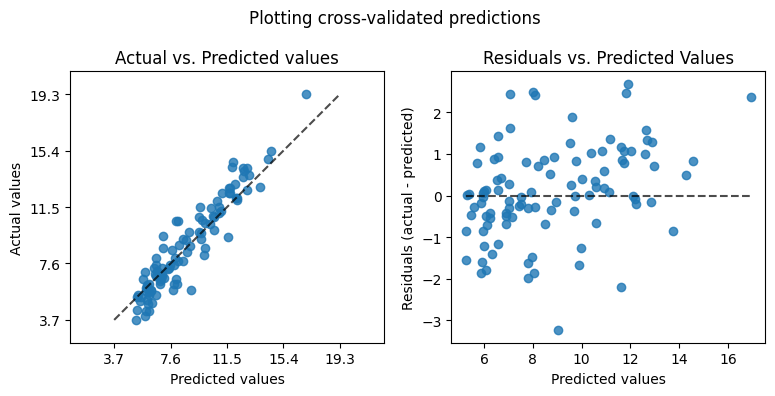

In [10]:
from sklearn.metrics import root_mean_squared_error, r2_score, PredictionErrorDisplay
import matplotlib.pyplot as plt

y_train = train_h2o[y].as_data_frame().values
y_pred = aml.leader.predict(train_h2o).as_data_frame().values

print(f'RMSE: {root_mean_squared_error(y_true=y_train, y_pred=y_pred)}')
print(f'R2: {r2_score(y_true=y_train, y_pred=y_pred)}')

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_true=y_train,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_true=y_train,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show();